In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import glob
import tables
%matplotlib inline

In [2]:
def IC_Lite(H5file):
    
    Tab = tables.open_file(H5file,mode='r')
    root = Tab.root.MC

    data = root
    
    Nevents = len(data.events)

    DatL=[]
    DatL.append(0)
    for x in range(0,Nevents):
        DatL.append(data.extents[x]["last_hit"])

    EVENTS = []
    
    for y in range(0,Nevents):
        EventNum = data.events[y]["evt_number"]
        Energy   = data.events[y]["evt_energy"]
        #Evnt.append(EventNum)
        #Enrg.append(Energy)
        Xhit = []
        Yhit = []
        Zhit = []
        Ehit = []
        Ihit = []

        for x in range(DatL[y],DatL[y+1]):

            Xhit.append(data.hits[x]["hit_position"][0])
            Yhit.append(data.hits[x]["hit_position"][1])
            Zhit.append(data.hits[x]["hit_position"][2])
            Ehit.append(data.hits[x]["hit_energy"])
            Ihit.append(data.hits[x]["hit_time"])

        EVENT = [EventNum,Energy,Ihit,Ehit,Xhit,Yhit,Zhit]
        EVENTS.append(EVENT)
    return EVENTS
    

In [23]:
path = '/Users/austinmcdonald/Desktop/research/Side Projects/Nexus-100kg/'
folder = '/Tl208/'
#folder = '/Bi214/'
#folder = '/bb0nu/'

In [24]:
Files = glob.glob(path+folder+'*.h5')


In [40]:
# how you import 1 hf file
# the function gives a list of list
# the iformation is in the form 
# [EventNum,Energy,Index hit,Energy hit,Xhit,Yhit,Zhit]
events = IC_Lite(Files[0])

In [41]:
#this is how you seperate the energys from the event data
Energys = [ events[i][1] for i in range(len(events)) ]
len(Energys)

#and this would be for x positions 
#Xpos = [ events[i][6] for i in range(len(events)) ]

647

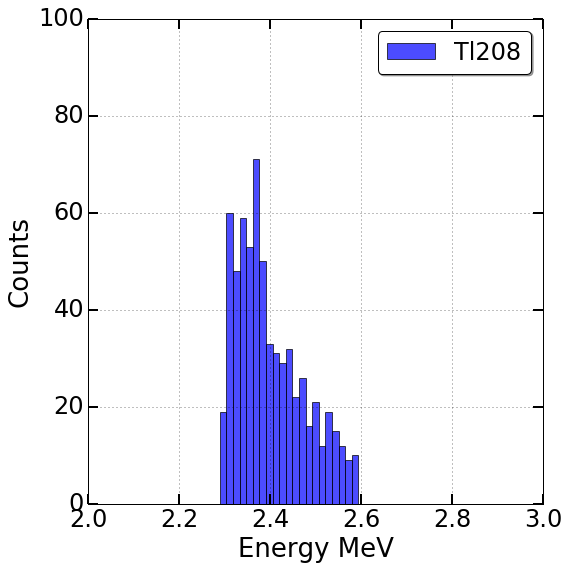

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
Bins = np.linspace(2,3.0,70)
plt.hist(Energys,bins=Bins,alpha=0.7,label='Tl208')

plt.ylabel("Counts",fontsize=26)
plt.xlabel("Energy MeV",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xlim(2,3)
plt.ylim(0,100)
plt.grid(True)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/energyNoCut.pdf')
plt.show()

In [34]:
# if you want to do it for multiple files just add the events
# I recommend testing with only 1 or 2 files because it will 
# take some time to go through a larger production
AllEvents = []
for q in range(0,len(Files)):
    events += IC_Lite(Files[q])

In [35]:
Energys = [ events[i][1] for i in range(len(events)) ]
len(Energys)

24183

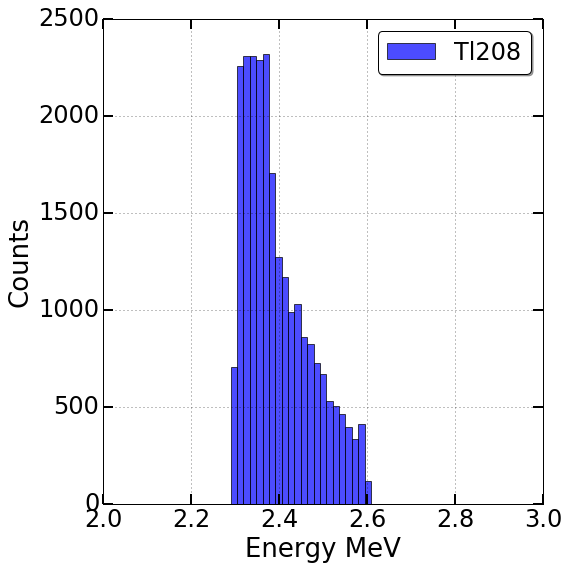

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
Bins = np.linspace(2,3.0,70)

plt.hist(Energys,bins=Bins,alpha=0.7,label='Tl208')
plt.ylabel("Counts",fontsize=26)
plt.xlabel("Energy MeV",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xlim(2,3)
#plt.ylim(0,80)
plt.grid(True)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/energyNoCut.pdf')
plt.show()